# Task 1: Prediction using Supervised Learning

##### Aim is to predict the percentage of a student based on the number of study hours

Data can be found at: https://bit.ly/w-data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
#reading the data
df=pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#for missing values
print ("Missing values :  ", df.isnull().sum().values.sum())

Missing values :   0


##### Therefore there are no missing values in the dataset.

Text(0.5, 1.0, 'Hours Boxplot')

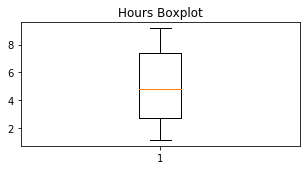

In [9]:
#for outliers
ig = plt.figure(figsize=(5,5))
plt.subplot(211)
plt.boxplot(df.iloc[:,0])
plt.title("Hours Boxplot")

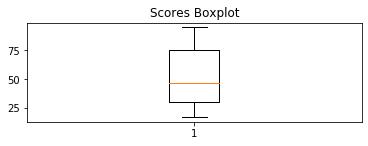

In [11]:
plt.subplot(212)
plt.boxplot(df.iloc[:,1])
plt.title("Scores Boxplot")
plt.show()

##### There are no outliers in the dataset.

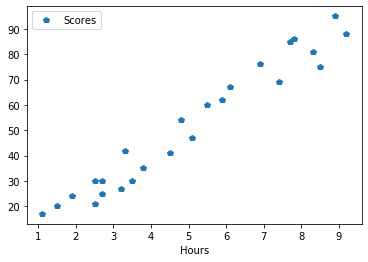

In [13]:
#distribution of scores
df.plot(x='Hours', y='Scores', style='p') 

##### from the above graph, we can see that there is a positive relationship between the hours studied and the percentage

In [15]:
#dividing the data into input and output
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [16]:
#splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [18]:
#fitting the linear model on the training set
Model = LinearRegression()  
Model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Plotting the regression line
line = Model.coef_*x+Model.intercept_

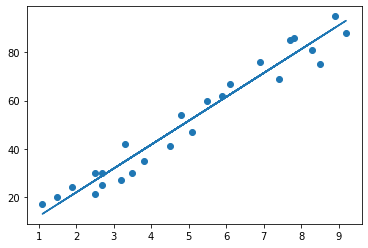

In [21]:
#plotting the test sets
plt.scatter(x,y)
plt.plot(x, line)

## Predicting the training and testing sets

In [22]:
y_train_pred = Model.predict(x_train)
print('R2 score of Training Data:',r2_score(y_train, y_train_pred))
y_test_pred = Model.predict(x_test)
print('R2 score of Testing Data:',r2_score(y_test, y_test_pred))

R2 score of Training Data: 0.9515510725211552
R2 score of Testing Data: 0.9454906892105356


#### predicting the percentage based on given number of hours

In [24]:
hours = [[9.25]]
pred = Model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
